# __<font color=blue>Telco Churn Analysis</font>__<br>
### Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [5]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [6]:
#load data 
telco_data = pd.read_csv(r'C:\Users\nklmy\OneDrive\Myvizhi\Telco-Customer-Churn.csv')

In [7]:
#top 5 data
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#to find rows and columns
telco_data.shape

(7043, 21)

In [9]:
#column names 
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#data types 
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#descriptive statistics of numerical variables
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is actually a _categorical_ column.So, 25%,50%,75% are not properly defined.
75% of the customers have tenure less than 55 months
Average monthly charge is 64.76 USD whereas 25% of the customers pay monthly charges greater than 89.85 USD per month 

Text(0.5, 1.0, 'Target variable count per category')

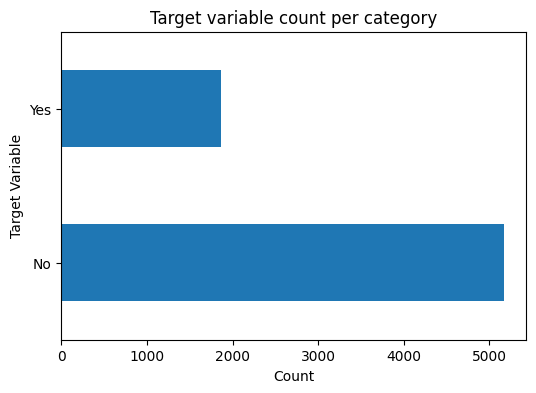

In [11]:
telco_data['Churn'].value_counts().plot(kind='barh', figsize=(6,4))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Target variable count per category")

In [12]:
#to find unchurned rate and churn rate from total
telco_data['Churn'].value_counts()/len(telco_data['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [13]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is no null values.let's go deeper to find the occurence of null values

### __Data Cleaning__

In [15]:
#copy of the original data
telecom_data = telco_data.copy()

In [16]:
# datatype conversion as numeric for the column TotalCharges
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges,errors="coerce")
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges column.

In [17]:
telecom_data.loc[telecom_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### __Handling missing values__

missing value compared to the total value contributes only 0.15% (11/7043)*100.So, dropping those values

In [18]:
#dropping the missing values
telecom_data.dropna(how ="any",inplace = True)

#telecom_data.fillna(0)

##### _Dividing Customer into bins based on tenure_

In [19]:
# to divide into bin , let us know the max value
print(telecom_data['tenure'].max())


72


__source to perform data binning__
##### https://datagy.io/pandas-cut-qcut/

In [20]:
labels = ["{0}-{1}".format(i, i+11) for i in range(1, 72, 12)]

telecom_data['tenure_bins'] = pd.cut(telecom_data.tenure, range(1,80,12),right = False,labels =labels)

In [21]:
telecom_data['tenure_bins'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_bins, dtype: int64

##### _removing columns not necessary for processing data_

In [22]:
telecom_data.drop(columns =['tenure','customerID'],axis =1,inplace = True)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


### __Data Exploration__

##### 1.Plot distribution of individual predictors by churn 

### Univariate Analysis

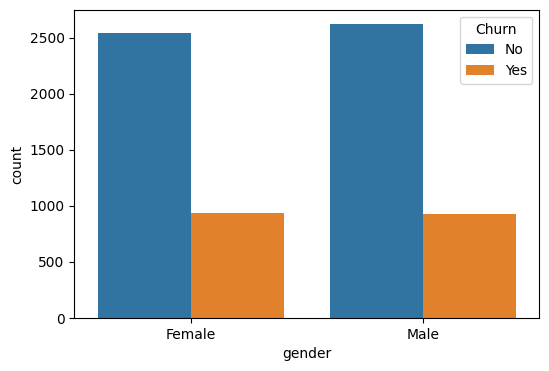

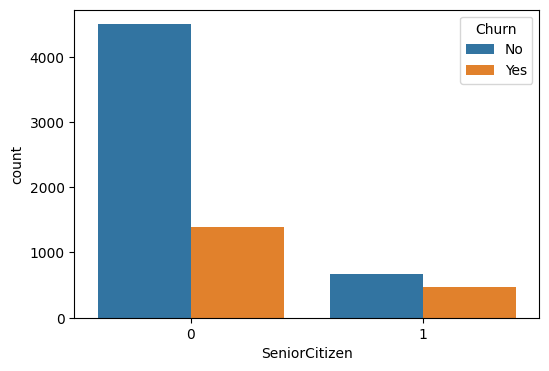

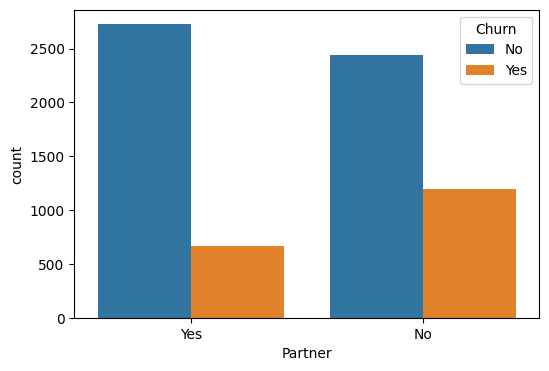

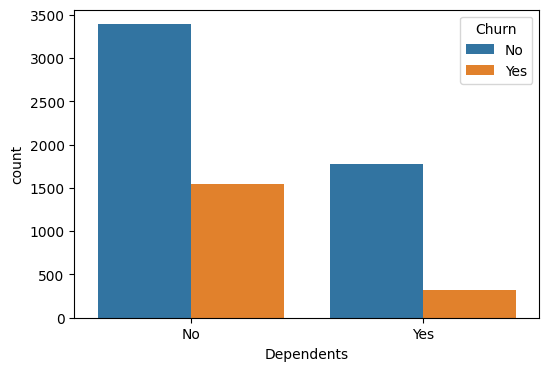

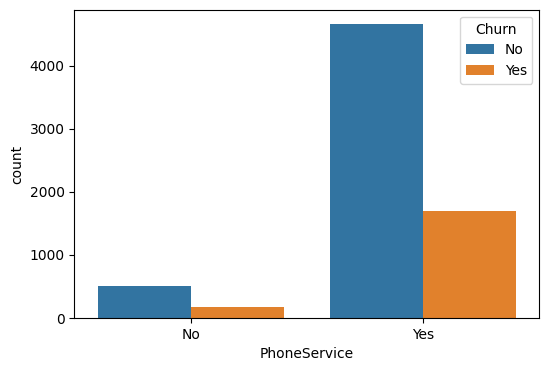

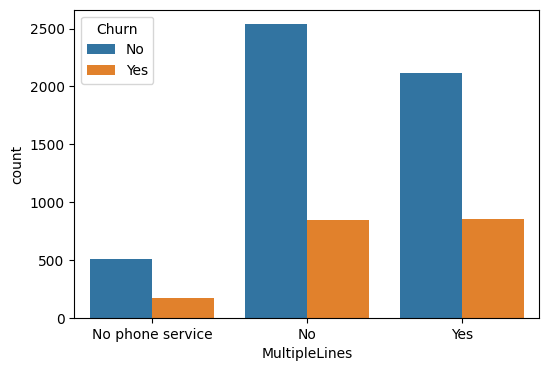

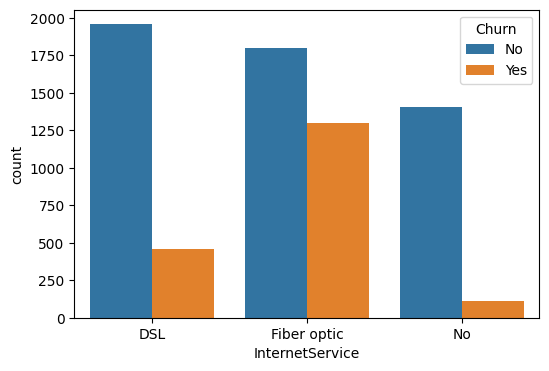

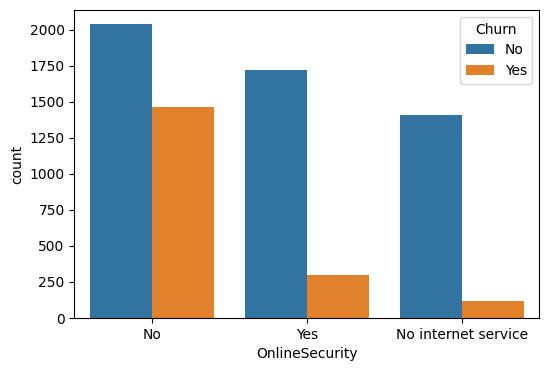

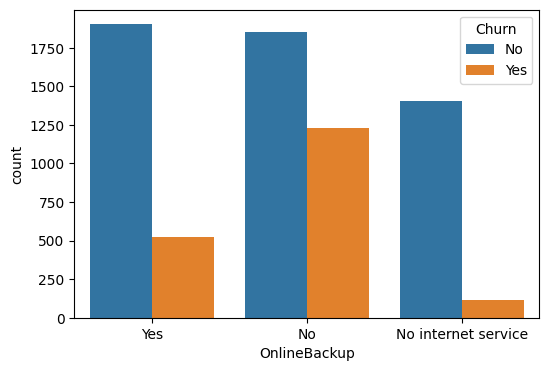

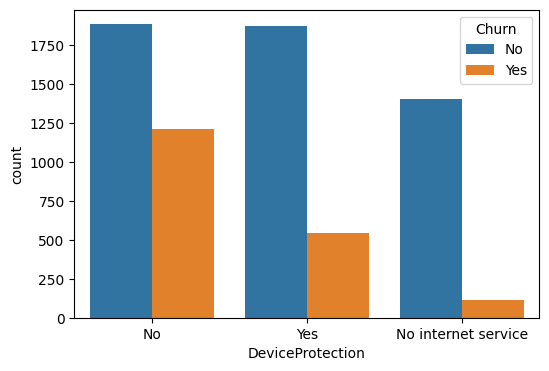

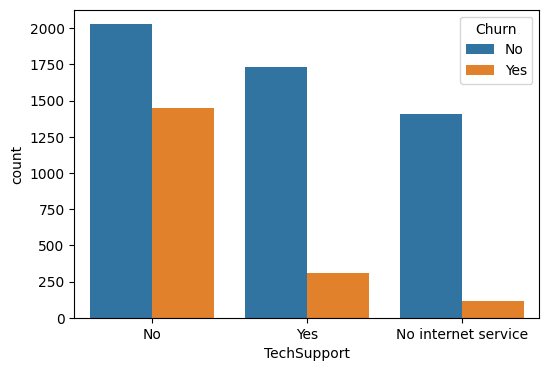

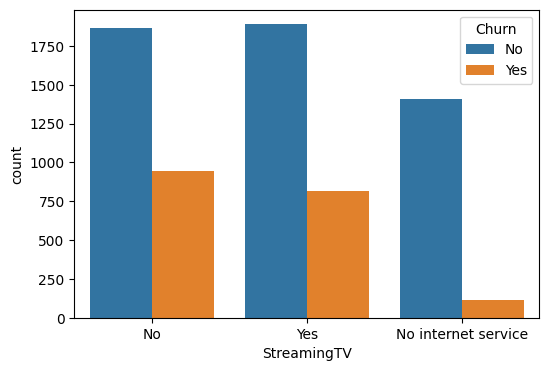

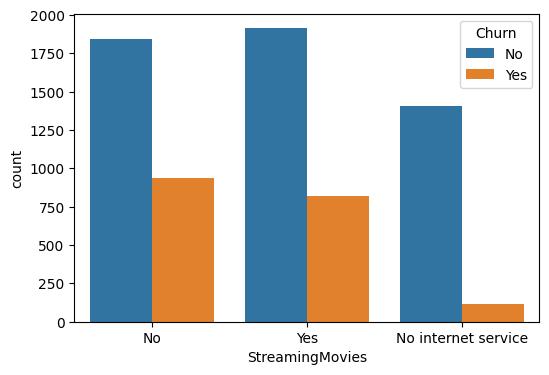

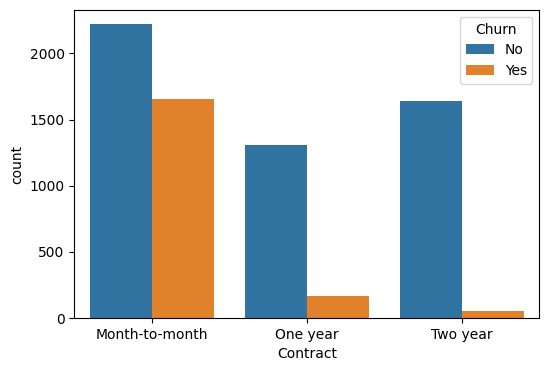

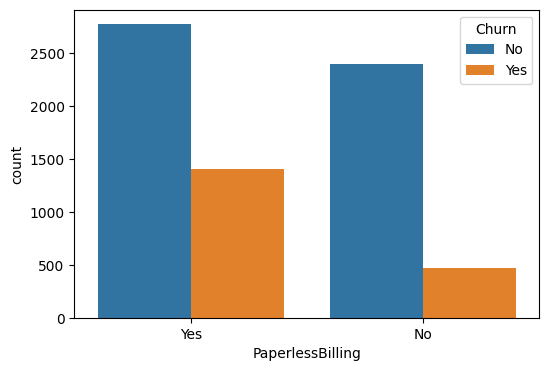

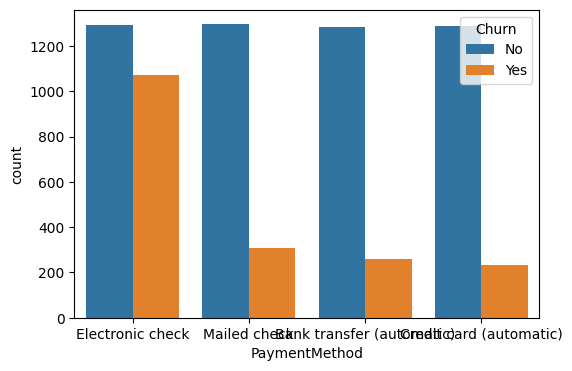

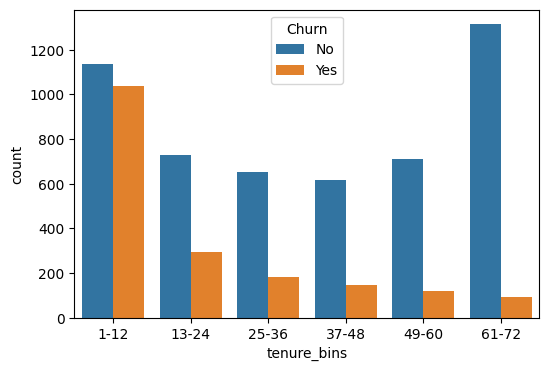

In [23]:
#excluding numerical variables and performing univariate analysis
for i, predictor in enumerate(telecom_data.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    fig = plt.gcf()
    # Change seaborn plot size
    fig.set_size_inches(6, 4)
  
    sns.countplot(data= telecom_data,x= predictor,hue ='Churn')

##### _2.Convert Churn into numerical variable (ie Yes =1,No =0)_

In [24]:
telecom_data['Churn'] = np.where(telecom_data.Churn == 'Yes',1,0)

In [25]:
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


##### _3.Convert all categorical variables into dummy variables_

In [26]:
telecom_data_dummies = pd.get_dummies(telecom_data)


In [27]:
telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins_1-12,tenure_bins_13-24,tenure_bins_25-36,tenure_bins_37-48,tenure_bins_49-60,tenure_bins_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


##### _4.Relationship between MonthlyCharges and TotalCharges_

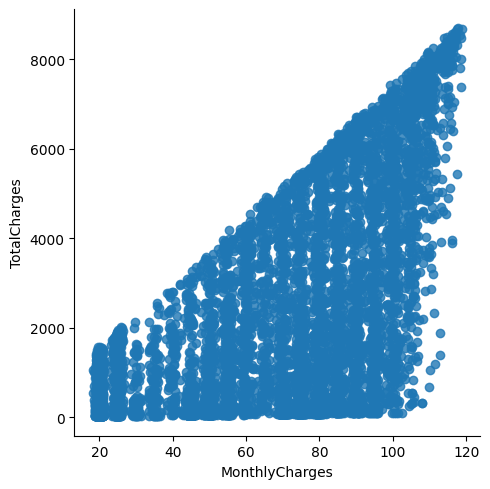

In [28]:
#lm plot to find linear/non-linear relationship 
sns.lmplot(data= telecom_data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg = False)
#fit_reg parameter for creating a regression model

TotalCharges increases as MonthlyCharges increases

Text(0.5, 1.0, 'Monthly Charges by Churn')

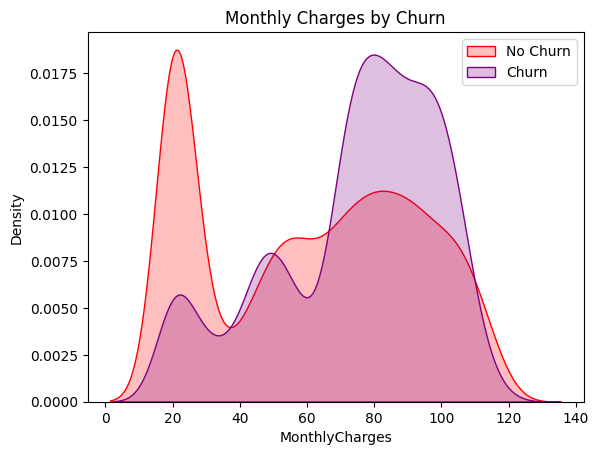

In [29]:
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
#analogous to a histogram, and visual effect can be designed. for Monthly charges, churn density
kde_mon = sns.kdeplot(telecom_data_dummies.MonthlyCharges[telecom_data_dummies["Churn"] == 0], 
                      color= "Red",fill = True)
kde_mon= sns.kdeplot(telecom_data_dummies.MonthlyCharges[telecom_data_dummies["Churn"] == 1], 
                      ax =kde_mon,color= "Purple",fill = True)
kde_mon.legend(["No Churn","Churn"],loc ='upper right')
kde_mon.set_xlabel('MonthlyCharges')
kde_mon.set_ylabel('Density')
kde_mon.set_title('Monthly Charges by Churn')

Churn is high when the MonthlyCharges are high

Text(0.5, 1.0, 'Total Charges by Churn')

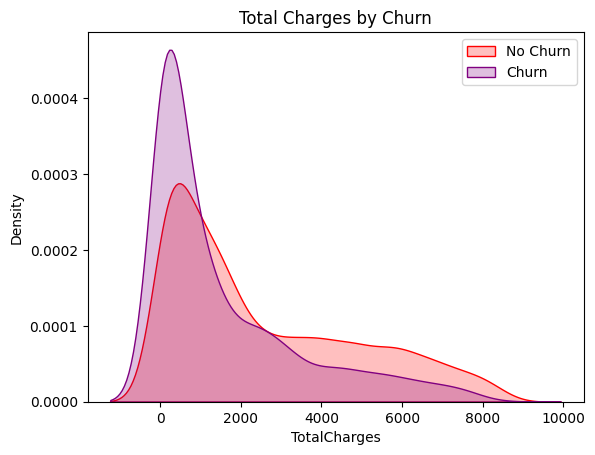

In [30]:
kde_tot = sns.kdeplot(telecom_data_dummies.TotalCharges[telecom_data_dummies["Churn"] == 0], 
                      color= "Red",fill = True)
kde_tot= sns.kdeplot(telecom_data_dummies.TotalCharges[telecom_data_dummies["Churn"] == 1], 
                      ax =kde_tot,color= "Purple",fill = True)
kde_tot.legend(["No Churn","Churn"],loc ='upper right')
kde_tot.set_xlabel('TotalCharges')
kde_tot.set_ylabel('Density')
kde_tot.set_title('Total Charges by Churn')

__Insight__:Churn is high when TotalCharges are low.It may be due to the reason that more customers fall under Month to Month Contract.
This can be seen in univariate analysis by Contract.

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :
    - Higher Monthly Charge at lower tenure results into lower Total Charge.
    Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

##### _5.Building a correlation of all predictors with churn_

<Axes: >

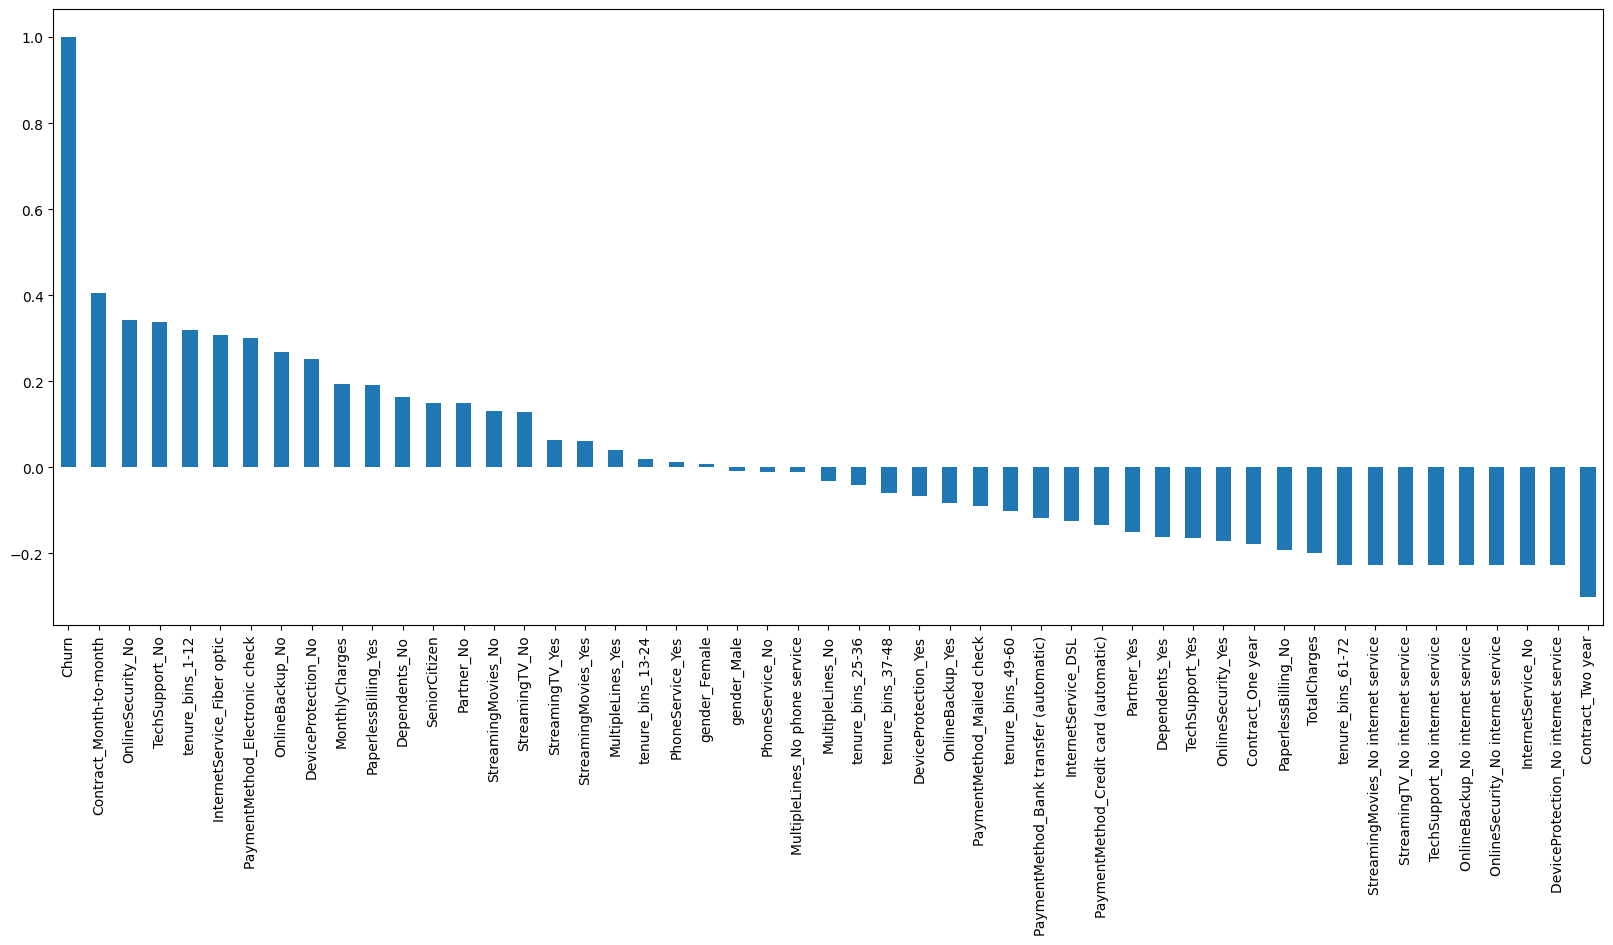

In [31]:
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### __Derived insights__

1.Monthly contract customers have high churn.

2.__No online Security,No tech support,No online backup,no device protection ,one year tenure customers__ have high churners.

3.__Internet service as fibre optic,Electronic check payment method,senior citizen__ have high churners.

4.There is no impact on churn based on gender, phone service, multiple lines

5.__Low churn in case of no internet service subscription,engaged customer 5+ years__

<Axes: >

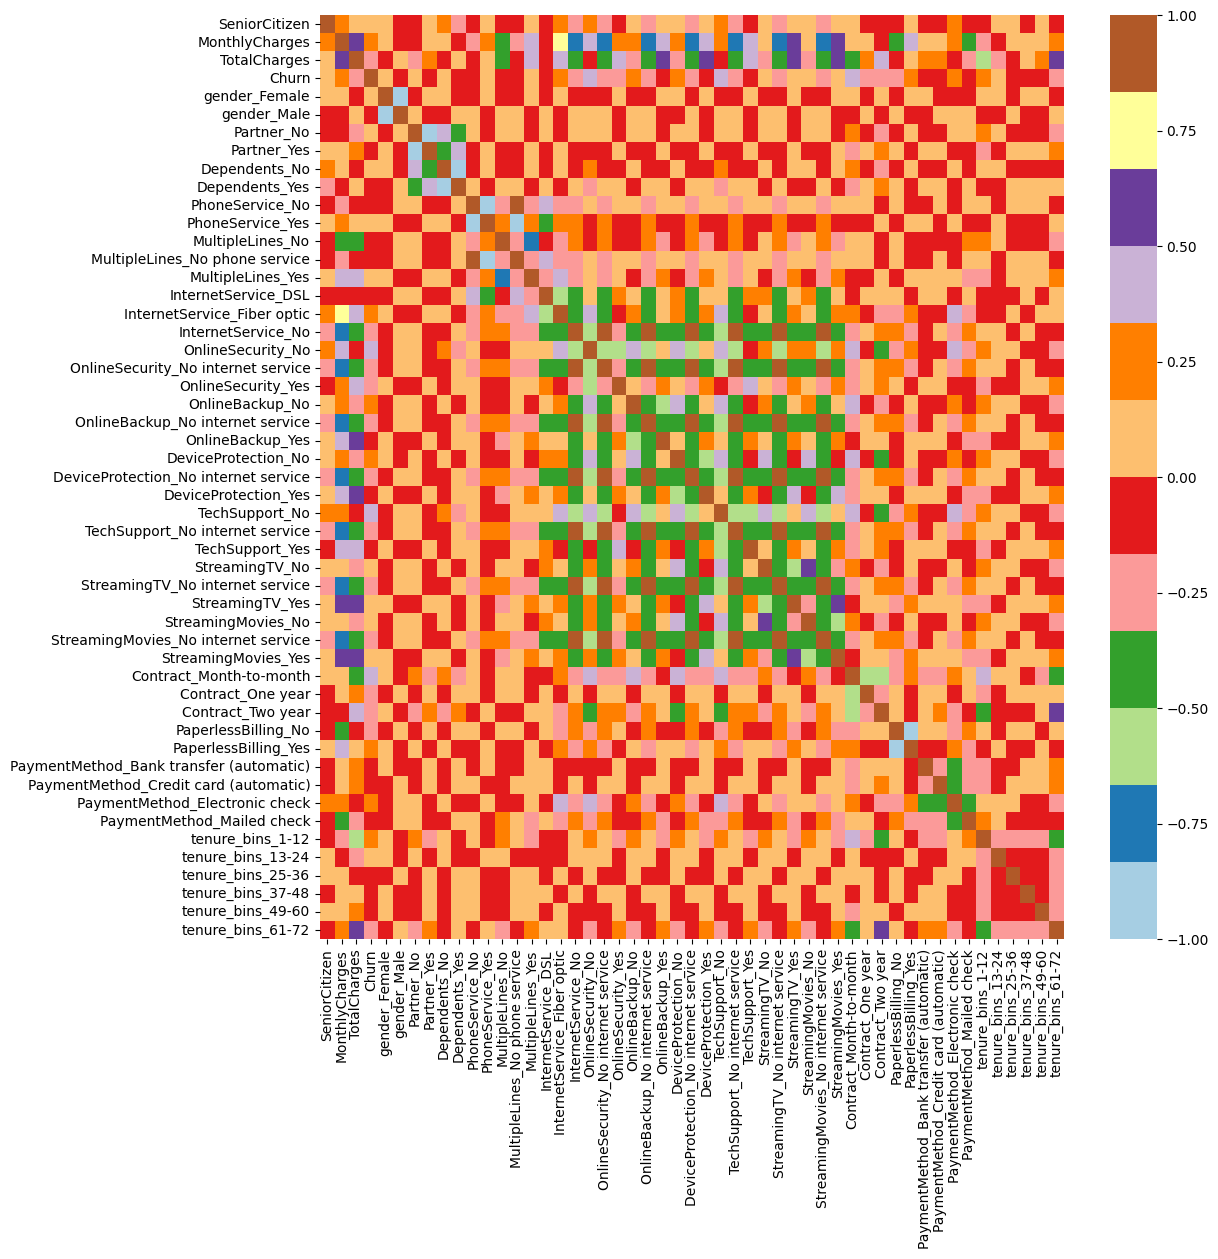

In [32]:
plt.figure(figsize = (12,12))
sns.heatmap(telecom_data_dummies.corr(),cmap='Paired')#matplotlib colormap name ,The mapping from data values to color space

 ### __Bivariate Analysis__

In [33]:
new_df1_target0 = telecom_data.loc[telecom_data["Churn"] == 0]
new_df1_target1 = telecom_data.loc[telecom_data["Churn"] == 1]

In [56]:
def bivariateplot(df,col,title, hue =None):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 28
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 3 + 2*len(temp.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=0) #(to make the xlabel rotate)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order = df[col].value_counts().index,hue = hue,palette ='bright')
    
    plt.show()

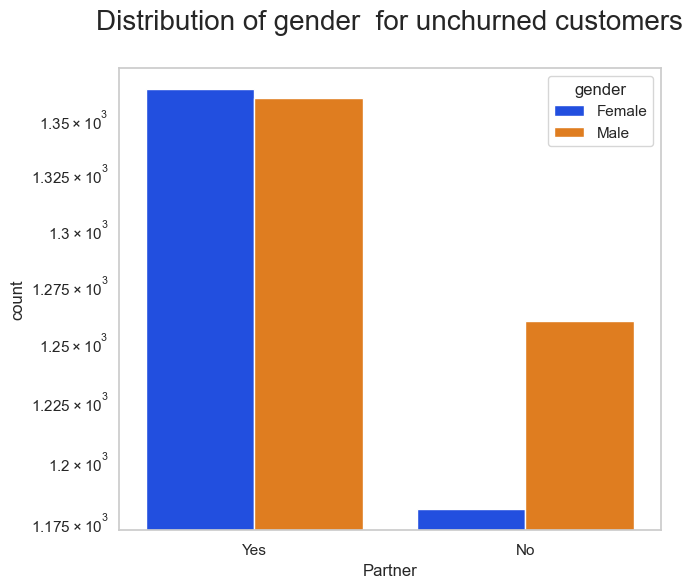

In [57]:
bivariateplot(new_df1_target0,col = 'Partner',title ='Distribution of gender  for unchurned customers', hue ='gender')

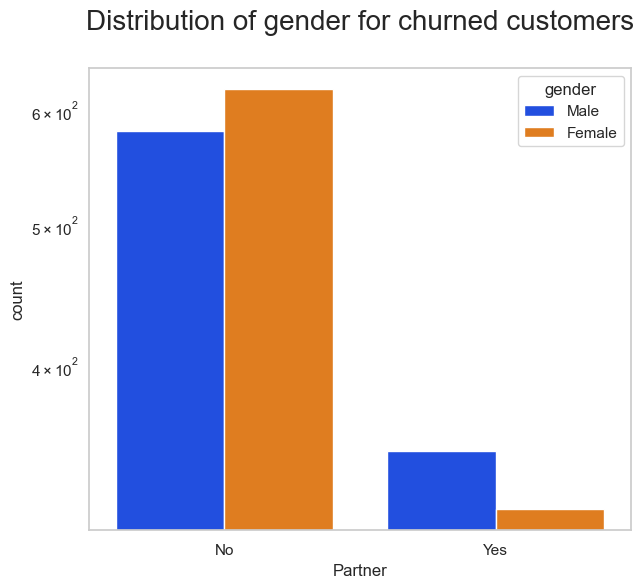

In [54]:
bivariateplot(new_df1_target1,col = 'Partner',title ='Distribution of gender for churned customers', hue ='gender')

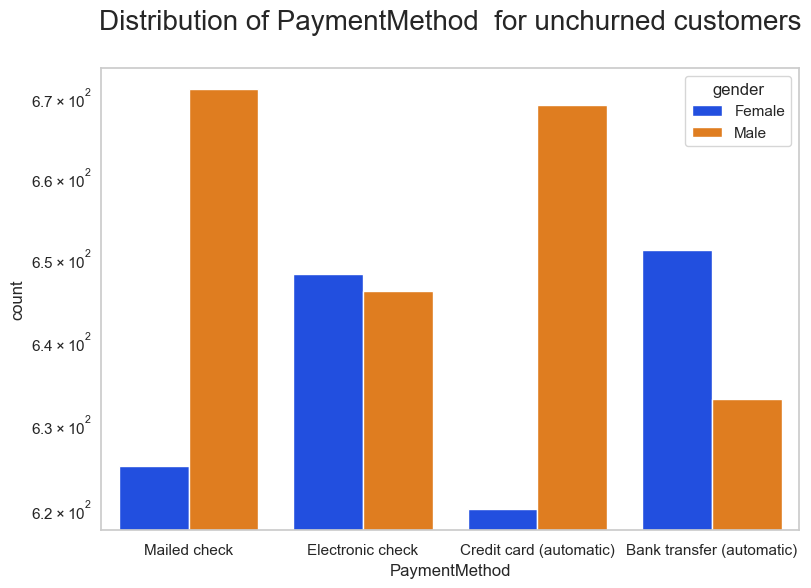

In [58]:
bivariateplot(new_df1_target0,col = 'PaymentMethod',title ='Distribution of PaymentMethod  for unchurned customers', hue ='gender')

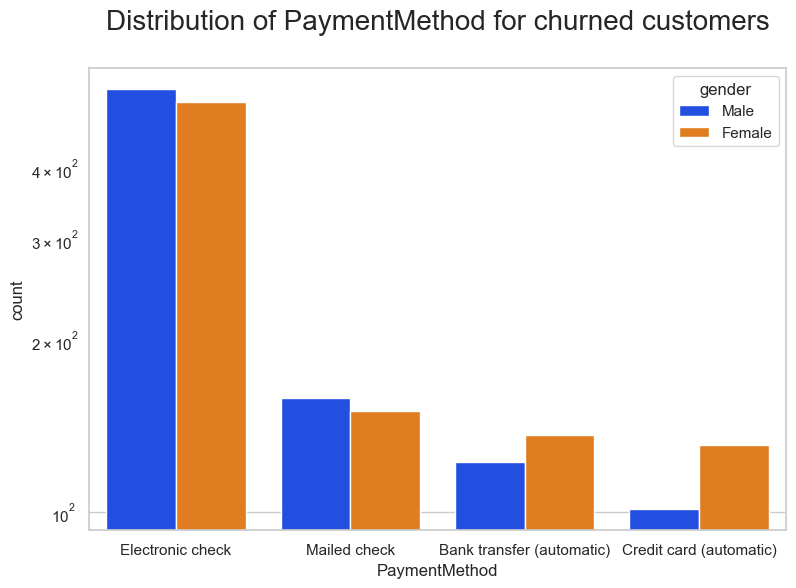

In [59]:
bivariateplot(new_df1_target1,col = 'PaymentMethod',title ='Distribution of PaymentMethod for churned customers', hue ='gender')

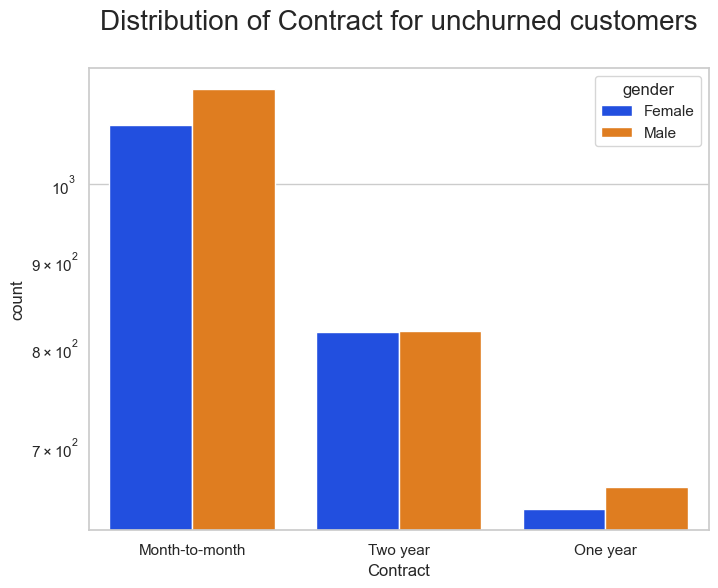

In [60]:
bivariateplot(new_df1_target0,col = 'Contract',title ='Distribution of Contract for unchurned customers', hue ='gender')

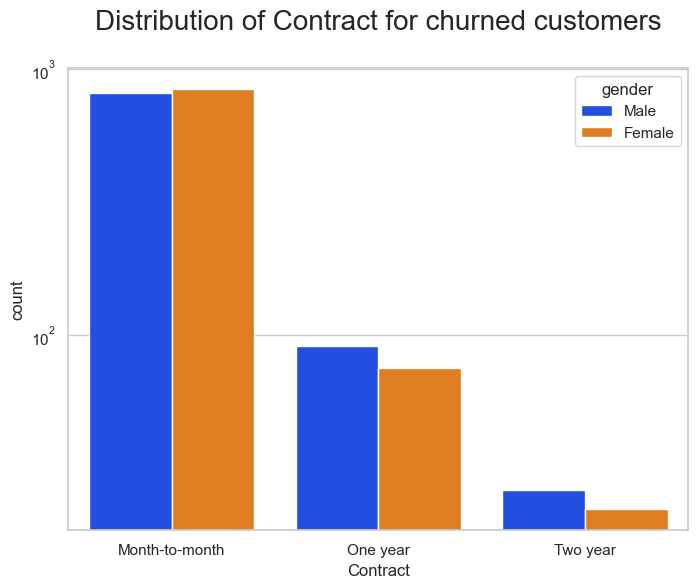

In [61]:
bivariateplot(new_df1_target1,col = 'Contract',title ='Distribution of Contract for churned customers', hue ='gender')

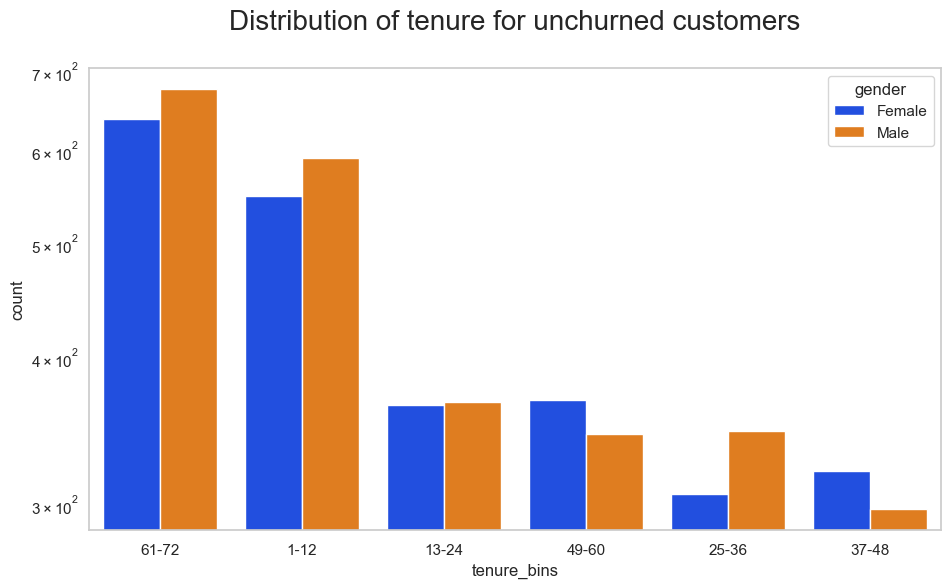

In [63]:
bivariateplot(new_df1_target0,col ='tenure_bins',title ='Distribution of tenure for unchurned customers', hue ='gender')

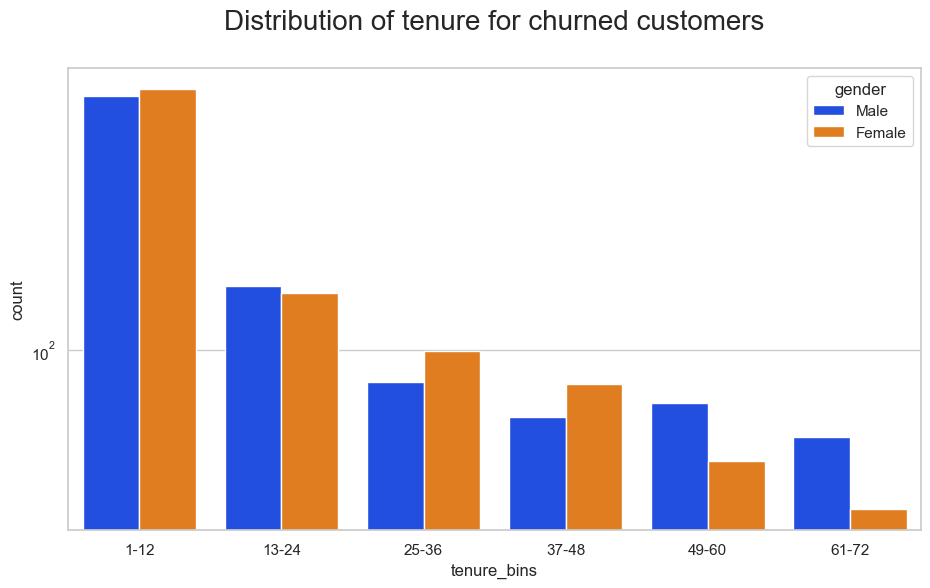

In [64]:
bivariateplot(new_df1_target1,col = 'tenure_bins',title ='Distribution of tenure for churned customers', hue ='gender')

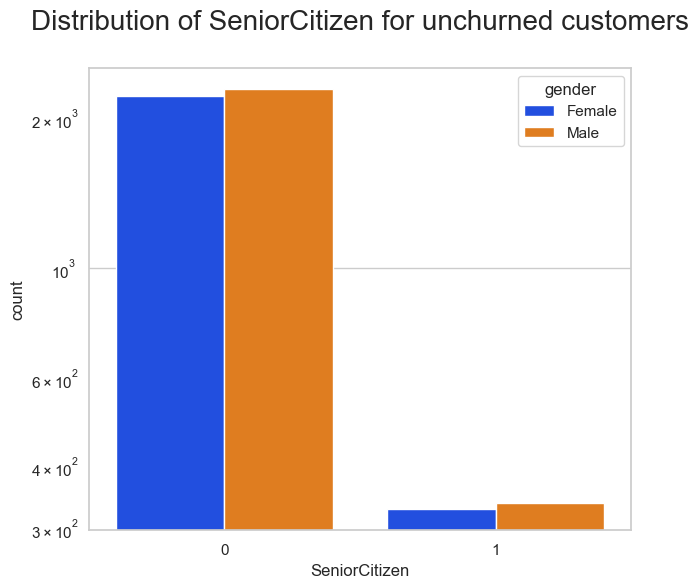

In [65]:
bivariateplot(new_df1_target0,col = 'SeniorCitizen',title ='Distribution of SeniorCitizen for unchurned customers', hue ='gender')

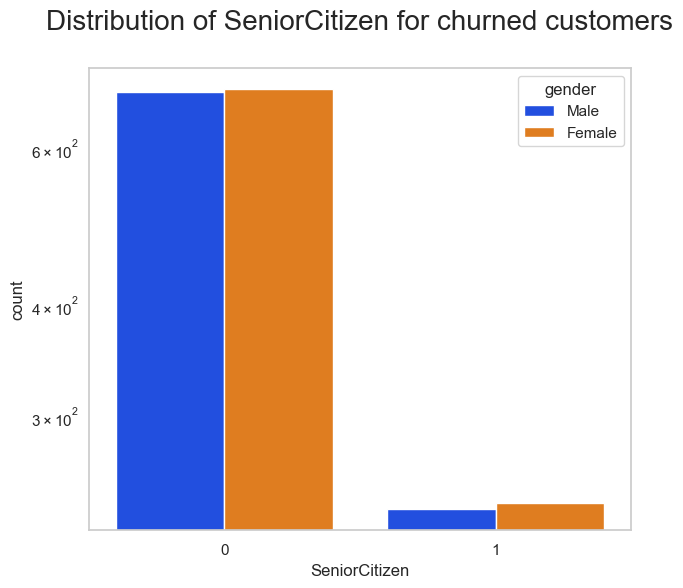

In [66]:
bivariateplot(new_df1_target1,col = 'SeniorCitizen',title ='Distribution of SeniorCitizen for churned customers', hue ='gender')

__Quick Insights__

1.Non SeniorCitizens are high churners.

2.Electronic check payment method and No tech support,No online security have high churners.

3.Monthly contract customers have high churners.




In [68]:
telecom_data_dummies.to_csv('telecom_ML_data')